PART A

Implementation of Sequence models
Use simple LSTM to perform sentiment analysis using IMDB dataset
Design your custom architecture by adding additional layers, LSTM units, changing the parameters, applying dropouts etc. Fine tune the model and elaborate the procedure with its performance in the conclusion


Part -B

Extend it with another dataset of your choice, to Bidirectional LSTM, GRU and BGRU. Analyse the performance of LSTM, BLSTM, GRU, BGRU and tabulate the results in terms of Precision, Recall and F1, with necessary plots and inference

OBJECTIVE:To implement a sequence model using a simple LSTM for sentiment analysis on the IMDB dataset. Additionally, to design and fine-tune a custom LSTM architecture by adding layers, adjusting parameters, and applying regularization techniques

IMDB Dataset Description:

The IMDB (Internet Movie Database) dataset is a widely used dataset for sentiment analysis. It contains:

50,000 movie reviews

25,000 reviews for training

25,000 reviews for testing

Each review is labeled as positive (1) or negative (0).

The reviews are preprocessed and encoded as integers, where each integer represents a specific word in the dataset's vocabulary.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [ ]:
# Load IMDB dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print(f'Training samples: {len(x_train)}')
print(f'Testing samples: {len(x_test)}')

Training samples: 25000
Testing samples: 25000


In [ ]:
# Show a sample review (converted from integer encoding to words)
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}

print("Sample review (integer encoded):", x_train[0])
print("Sample review (decoded):", ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]]))


Sample review (integer encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sample review (decoded): ? 

In [ ]:
# Pad sequences to ensure uniform input size
max_len = 200
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [ ]:
# Build Custom LSTM Model (Before Tuning)
model_before = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile model
model_before.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
history_before = model_before.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7066 - loss: 0.5402 - val_accuracy: 0.8709 - val_loss: 0.3199
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9010 - loss: 0.2527 - val_accuracy: 0.8656 - val_loss: 0.3165
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9330 - loss: 0.1824 - val_accuracy: 0.8611 - val_loss: 0.3443
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9470 - loss: 0.1432 - val_accuracy: 0.8676 - val_loss: 0.3644
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9630 - loss: 0.1039 - val_accuracy: 0.8580 - val_loss: 0.4678


In [ ]:
# Evaluate model
loss_before, accuracy_before = model_before.evaluate(x_test, y_test)
print(f'Before Tuning - Test Accuracy: {accuracy_before * 100:.2f}%')

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8580 - loss: 0.4776
Before Tuning - Test Accuracy: 85.80%


In [ ]:
# Display a few predictions
predictions = (model_before.predict(x_test[:10]) > 0.5).astype('int32')
for i in range(10):
    print(f"Review {i+1}: {'Positive' if predictions[i] == 1 else 'Negative'} (Actual: {'Positive' if y_test[i] == 1 else 'Negative'})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Review 1: Negative (Actual: Negative)
Review 2: Positive (Actual: Positive)
Review 3: Positive (Actual: Positive)
Review 4: Positive (Actual: Negative)
Review 5: Positive (Actual: Positive)
Review 6: Positive (Actual: Positive)
Review 7: Positive (Actual: Positive)
Review 8: Negative (Actual: Negative)
Review 9: Positive (Actual: Negative)
Review 10: Positive (Actual: Positive)


In [ ]:
# Build Custom LSTM Model (After Tuning)
model_after = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.LSTM(32, kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile model
model_after.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])


In [ ]:
# Train model
history_after = model_after.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate model
loss_after, accuracy_after = model_after.evaluate(x_test, y_test)
print(f'After Tuning - Test Accuracy: {accuracy_after * 100:.2f}%')

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.6252 - loss: 3.3593 - val_accuracy: 0.8380 - val_loss: 0.7234
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8846 - loss: 0.5221 - val_accuracy: 0.8572 - val_loss: 0.3844
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9169 - loss: 0.2711 - val_accuracy: 0.8502 - val_loss: 0.3810
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9285 - loss: 0.2220 - val_accuracy: 0.8479 - val_loss: 0.4411
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9389 - loss: 0.1964 - val_accuracy: 0.8477 - val_loss: 0.3997
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9512 - loss: 0.1662 - val_accuracy: 0.8456 - val_loss: 0.4267
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9537 - loss: 0.1572 - val_accuracy: 0.8343 - val_loss: 0.4451
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9552 - loss: 0.1497 - val_

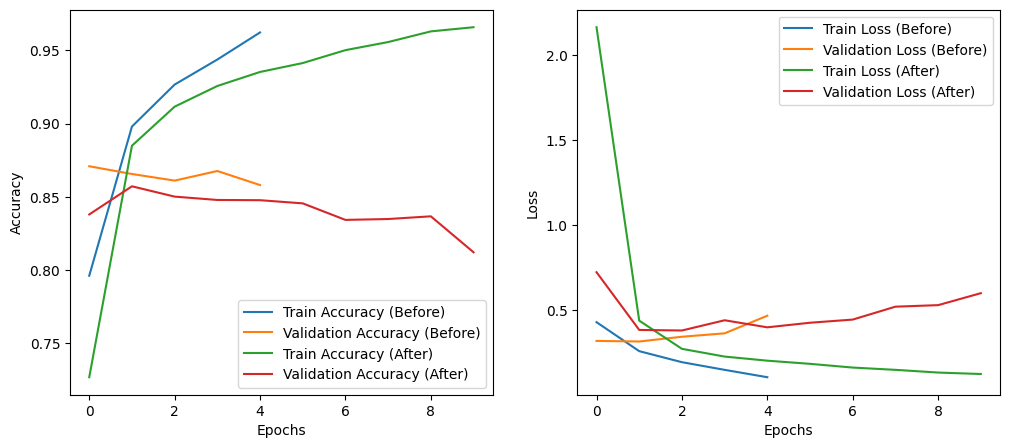


Conclusion:
Before Tuning - Final Test Accuracy: 85.80%
After Tuning - Final Test Accuracy: 81.22%


In [ ]:
# Plot comparison
plt.figure(figsize=(12, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history_before.history['accuracy'], label='Train Accuracy (Before)')
plt.plot(history_before.history['val_accuracy'], label='Validation Accuracy (Before)')
plt.plot(history_after.history['accuracy'], label='Train Accuracy (After)')
plt.plot(history_after.history['val_accuracy'], label='Validation Accuracy (After)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history_before.history['loss'], label='Train Loss (Before)')
plt.plot(history_before.history['val_loss'], label='Validation Loss (Before)')
plt.plot(history_after.history['loss'], label='Train Loss (After)')
plt.plot(history_after.history['val_loss'], label='Validation Loss (After)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Conclusion
print("\nConclusion:")
print(f"Before Tuning - Final Test Accuracy: {accuracy_before * 100:.2f}%")
print(f"After Tuning - Final Test Accuracy: {accuracy_after * 100:.2f}%")

**Conclusion**:

Despite the tuning, the accuracy dropped. which shows tuning doesn't always gives better accuracy. Further adjustments, such as reducing the number of LSTM layers, lowering dropout rates, or increasing regularization, may help improve performance.

**PART B** :


Extend it with another dataset of your choice, to Bidirectional LSTM, GRU and BGRU. Analyse the performance of LSTM, BLSTM, GRU, BGRU and tabulate the results in terms of Precision, Recall and F1, with necessary plots and inference

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import zipfile
import os


Objective:
The objective of this project is to perform sentiment analysis using various sequence models (LSTM, BLSTM, GRU, and BGRU) on the SMS Spam Collection dataset. The goal is to classify SMS messages as either spam or ham (non-spam) using deep learning models, compare their performance using metrics such as Precision, Recall, and F1-Score.

Dataset Details:

SMS Spam Collection Dataset from the UCI Machine Learning Repository. It contains 5,574 SMS messages labeled as ham (non-spam) or spam.

Dataset Details:
Total Messages: 5,574

Ham (Non-Spam) Messages: 4,827 (Approx. 86.6%)

Spam Messages: 747 (Approx. 13.4%)

File Format: Plain text file (SMSSpamCollection)

Labeling:

"ham" for non-spam messages

"spam" for spam messages

In [ ]:
# Download and extract the SMS Spam Collection dataset
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
zip_path = keras.utils.get_file('smsspamcollection.zip', dataset_url)
extract_dir = os.path.splitext(zip_path)[0]

# Extract only if not already extracted
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

# Read the actual data
data_path = os.path.join(extract_dir, 'SMSSpamCollection')
sms_data = pd.read_csv(data_path, sep='\t', header=None, names=['label', 'text'])

In [ ]:
# Encode labels (ham = 0, spam = 1)
sms_data['label'] = sms_data['label'].map({'ham': 0, 'spam': 1})

In [ ]:
# Tokenization and Padding
vocab_size = 10000
max_len = 200
tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(sms_data['text'])

x_data = tokenizer.texts_to_sequences(sms_data['text'])
x_data = keras.preprocessing.sequence.pad_sequences(x_data, maxlen=max_len)
y_data = sms_data['label'].values

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [ ]:
def build_model(layer_type, bidirectional=False):
    model = keras.Sequential([
        layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
        layers.Bidirectional(layer_type(64)) if bidirectional else layer_type(64),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Model definitions
models = {
    'LSTM': build_model(layers.LSTM),
    'BLSTM': build_model(layers.LSTM, bidirectional=True),
    'GRU': build_model(layers.GRU),
    'BGRU': build_model(layers.GRU, bidirectional=True)
}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Training and evaluation
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)
    y_pred = (model.predict(x_test) > 0.5).astype('int32')
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report
    print(f"{name} - Test Accuracy: {accuracy * 100:.2f}%")
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

Training LSTM...
Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9928 - val_loss: 0.0388
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9919 - val_loss: 0.0376
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9996 - loss: 7.3084e-04 - val_accuracy: 0.9937 - val_loss: 0.0393
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 2.7129e-04 - val_accuracy: 0.9928 - val_loss: 0.0420
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 1.6495e-04 - val_accuracy: 0.9928 - val_loss: 0.0424
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9925 - loss: 0.0510
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM - Test Accuracy: 99.28%

LSTM Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00       966
        Spam       0.99      0.96      0.97       149

    acc

In [ ]:
# Tabulate results
df = pd.DataFrame({
    model: {
        'Precision': results[model]['1']['precision'],
        'Recall': results[model]['1']['recall'],
        'F1-Score': results[model]['1']['f1-score']
    } for model in results
})

print("\nPerformance Metrics:")
print(df)



Performance Metrics:
               LSTM     BLSTM       GRU      BGRU
Precision  0.986207  0.986111  0.992958  0.986111
Recall     0.959732  0.953020  0.946309  0.953020
F1-Score   0.972789  0.969283  0.969072  0.969283


<Figure size 1200x500 with 0 Axes>

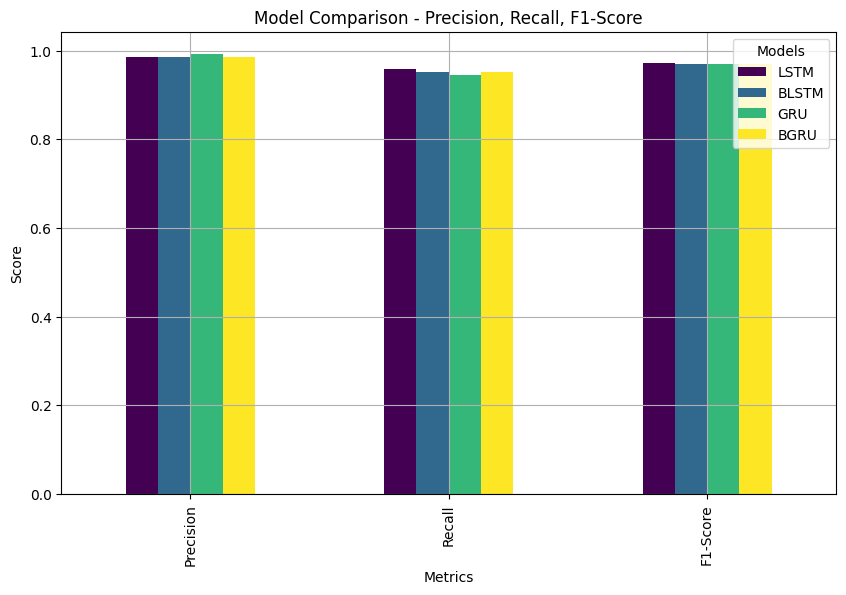

In [ ]:
# Plot comparison
plt.figure(figsize=(12, 5))
df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Model Comparison - Precision, Recall, F1-Score')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.legend(title='Models')
plt.grid(True)
plt.show()

**CONCLUSION**:
All the models are showing approximately similiar precisions of 98%. GRU tops with 99.29% of precision. recall and f1 scores are between 95-96.